* KNN

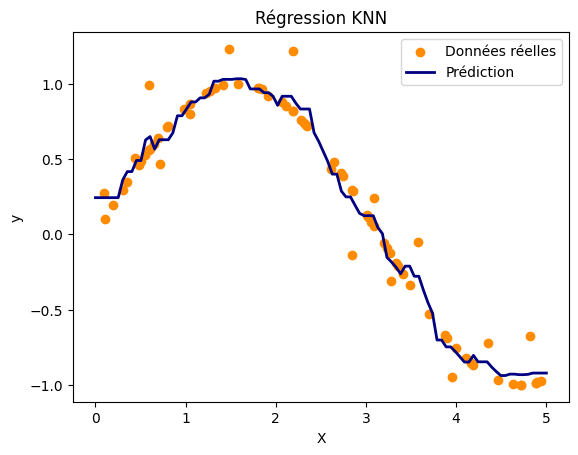

In [2]:
# Importation des bibliothèques nécessaires
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Génération de données de régression synthétiques
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Ajout de bruit aux données
y[::5] += 1 * (0.5 - np.random.rand(16))

# Création du modèle KNN pour régression
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

# Prédiction sur de nouvelles données
X_test = np.linspace(0, 5, 100)[:, np.newaxis]
y_pred = knn_regressor.predict(X_test)

# Affichage des résultats
plt.scatter(X, y, color='darkorange', label='Données réelles')
plt.plot(X_test, y_pred, color='navy', label='Prédiction', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Régression KNN')
plt.show()


In [3]:
# Importation des bibliothèques nécessaires
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Chargement des données d'exemple (iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création du modèle KNN pour classification
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn_classifier.predict(X_test)

# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitude du modèle : {accuracy:.2f}')


Exactitude du modèle : 1.00


* Regression linéaire

Erreur Quadratique Moyenne (MSE): 0.00
Coefficient de Détermination R^2: 1.00


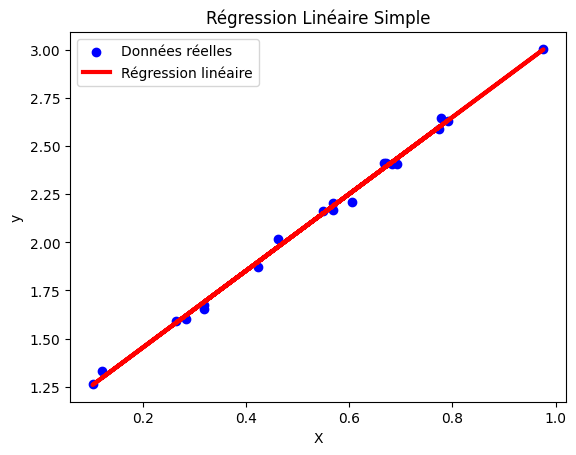

In [4]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Génération de données synthétiques pour l'exemple
np.random.seed(0)
X = np.random.rand(100, 1)  # Variables indépendantes
y = 2 * X + 1 + 0.1 * np.random.rand(100, 1)  # Variable dépendante avec bruit

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
linear_regressor = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
linear_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = linear_regressor.predict(X_test)

# Calcul de l'erreur quadratique moyenne (Mean Squared Error) et du coefficient de détermination R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f'Erreur Quadratique Moyenne (MSE): {mse:.2f}')
print(f'Coefficient de Détermination R^2: {r2:.2f}')

# Affichage de la régression linéaire
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Régression linéaire')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Régression Linéaire Simple')
plt.show()


Erreur Quadratique Moyenne (MSE): 0.00
Coefficient de Détermination R^2: 0.98
Coefficient (pente): 1.75
Ordonnée à l’origine: 1.17


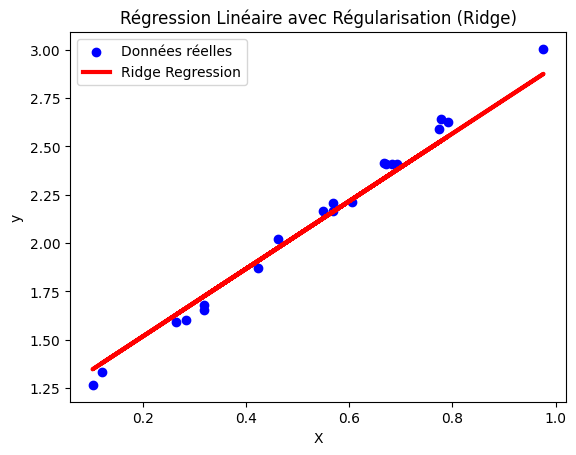

In [6]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge     # ← régularisation L2 (Ridge)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Génération de données synthétiques pour l'exemple
np.random.seed(0)
X = np.random.rand(100, 1)  # Variables indépendantes
y = 2 * X + 1 + 0.1 * np.random.rand(100, 1)  # Variable dépendante avec bruit

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire avec régularisation (Ridge)
linear_regressor = Ridge(alpha=1.0)  # ← alpha contrôle la force de la régularisation

# Entraînement du modèle sur l'ensemble d'entraînement
linear_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = linear_regressor.predict(X_test)

# Calcul de l'erreur quadratique moyenne (Mean Squared Error) et du coefficient de détermination R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f'Erreur Quadratique Moyenne (MSE): {mse:.2f}')
print(f'Coefficient de Détermination R^2: {r2:.2f}')
print(f'Coefficient (pente): {linear_regressor.coef_[0]:.2f}')
print(f'Ordonnée à l’origine: {linear_regressor.intercept_[0]:.2f}')

# Affichage de la régression linéaire
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Régression Linéaire avec Régularisation (Ridge)')
plt.show()


* Régression polynomiale

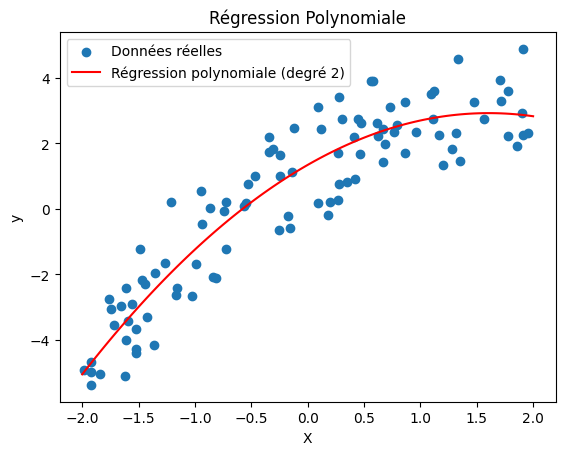

In [7]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Génération de données synthétiques pour l'exemple
np.random.seed(0)
X = np.random.rand(100, 1) * 4 - 2  # Variables indépendantes dans l'intervalle [-2, 2]
y = 1 + 2 * X - 0.5 * X**2 + np.random.randn(100, 1)  # Variable dépendante avec bruit quadratique

# Création du modèle de régression polynomiale de degré 2
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())


# Entraînement du modèle sur les données
model.fit(X, y)

# Prédiction sur de nouvelles données
X_new = np.linspace(-2, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# Affichage des résultats
plt.scatter(X, y, label='Données réelles')
plt.plot(X_new, y_pred, color='red', label='Régression polynomiale (degré 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Régression Polynomiale')
plt.show()
